# Lab: CV w/CNNs

# Part 1: Libraries & Preprocessing

### Step 1: Libraries

Bring in the germane libraries.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

2026-02-17 21:34:14.167761: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 2: Data

Download and fetch the data with the following Python code (Note: We will use faces.images for X.)

In [2]:
# Load the data
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.images
y = faces.target.reshape(-1, 1)

### Step 3: Sample Image

Select an image from this dataset and display it (Hint: Use the plt.cm.gray color map with plt.imshow function).

In [ ]:
print(X.shape)

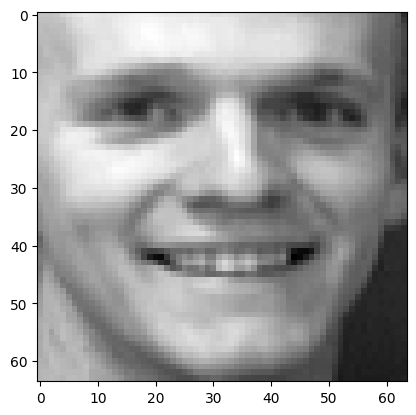

In [3]:
# Selecting an image
img_index = 42
example = X[img_index]

plt.imshow(example, cmap=plt.cm.gray)

### Step 4: Training and testing sets

Setup training and testing sets . Use a 50/50 split for each class (5 training images and 5 test images per person). Print the dimension of each of the feature (image) matrices. Because this is a small dataset, we will also use the test set for validation.

In [4]:
# Creating the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (200, 64, 64)
y_train shape: (200, 1)
X_test shape:  (200, 64, 64)
y_test shape:  (200, 1)


### Step 5: Vector conversion

Convert the vector of response variables to a matrix with 40 columns, with indicators for which person it is (one-hot encoded vectors). Print the dimensions of the new response vectors.

In [5]:
# Conversion
# print('Example Y variable before transformation:', y_train[0])
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
# print('Example Y variable after transformation:', y_train[0])

print(f"y_train_ohe shape: {y_train_ohe.shape}")
print(f"y_test_ohe shape:  {y_test_ohe.shape}")

y_train_ohe shape: (200, 40)
y_test_ohe shape:  (200, 40)


### Step 6: Reshape arrays

Reshape the image arrays so that they have 4 dimensions: (number of images, width of image, height of image, number of channels). For example, the array of training images should be (200, 64, 64, 1). Print the dimensions of the new image arrays.

In [6]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")

X_train shape: (200, 64, 64, 1)
X_test shape:  (200, 64, 64, 1)


## Part 2: Model 1

### Step 7: Model 1's Architecture

Fit a convolutional neural network using the following architecture, and print the output from training.
*   1 convolutional layer with:
  * 16 filters (neurons)
  * a window size of 3
  * stride size of 1
  * ReLU activation function
  * padding so that the feature is the same size as the original image
*   1 max pooling layer with:
  * window size of 2
  * stride size of 2
  * no padding
*   1 fully connected output layer with:
  * 40 nodes for each face to predict
  * softmax activation function
*   For training, use the Adam optimizer, 20 epochs, a batch size of 10, and the categorical cross entropy loss function.

In [ ]:
# Convolution Neural Network Model
input_tensor = Input(shape=(64, 64, 1))
x = Conv2D(16, kernel_size=3, strides=1, activation='relu', padding='same')(input_tensor)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Flatten()(x)
output_tensor = Dense(40, activation='softmax')(x)

model_1 = Model(inputs=input_tensor, outputs=output_tensor)

In [20]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, y_train_ohe, epochs=20, batch_size=10, validation_data=(X_test, y_test_ohe))
model_1.summary()

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 0.0439 - val_accuracy: 0.8650 - val_loss: 0.5321
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0239 - val_accuracy: 0.9300 - val_loss: 0.3889
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.9100 - val_loss: 0.3662
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.9200 - val_loss: 0.3257
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9250 - val_loss: 0.3158
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.9250 - val_loss: 0.3103
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9300 - val_loss: 0.3037
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9250 - v

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │       655,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,966,682 (7.50 MB)

 Trainable params: 655,560 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,311,122 (5.00 MB)

### Step 8: Model 1's loss and accuracy

Print the loss and accuracy on the test set.

In [35]:
# Loss and Accuracy
loss1, accuracy1 = model_1.evaluate(X_test, y_test_ohe)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9350 - loss: 0.2759
Test loss: 0.3467
Test accuracy: 0.9300


### Step 9: Print image

Pick one of the images from the test set, and print the image.

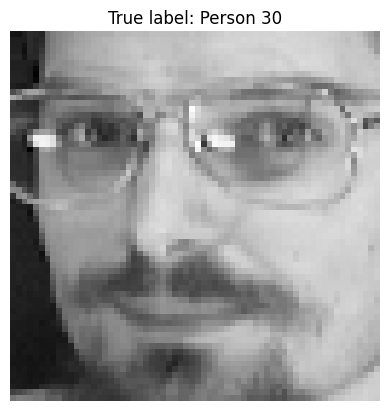

In [22]:
# An image
sample_image = X_test[42]

plt.imshow(sample_image.reshape(64, 64), cmap='gray')
plt.title(f"True label: Person {y_test[0][0]}")
plt.axis('off')
plt.show()

### Step 10: Feature maps

For the image you selected in (9), print the images of the feature maps from both the convolutional and pooling layers.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


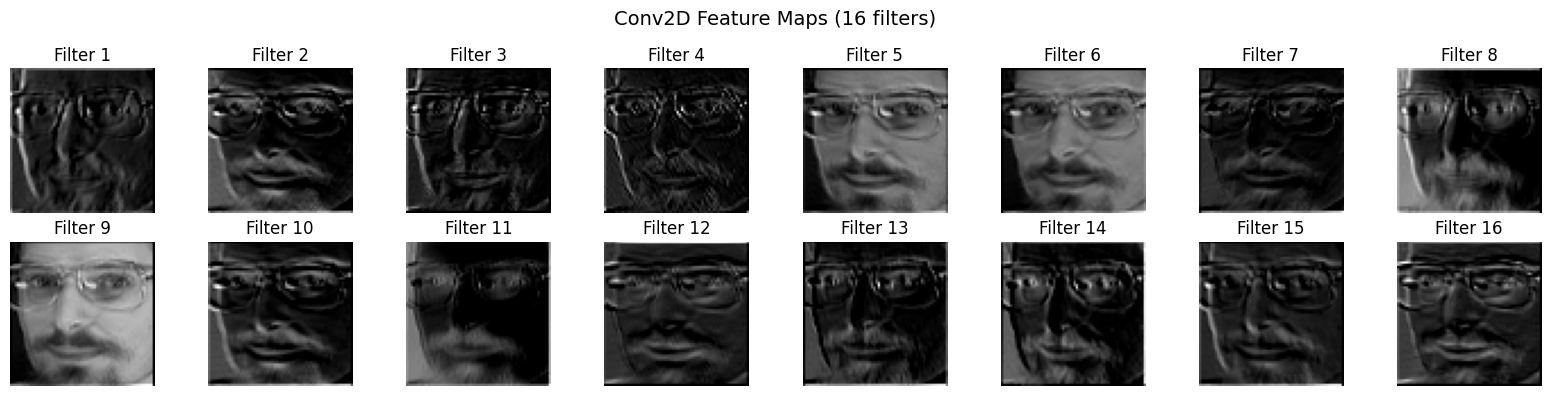

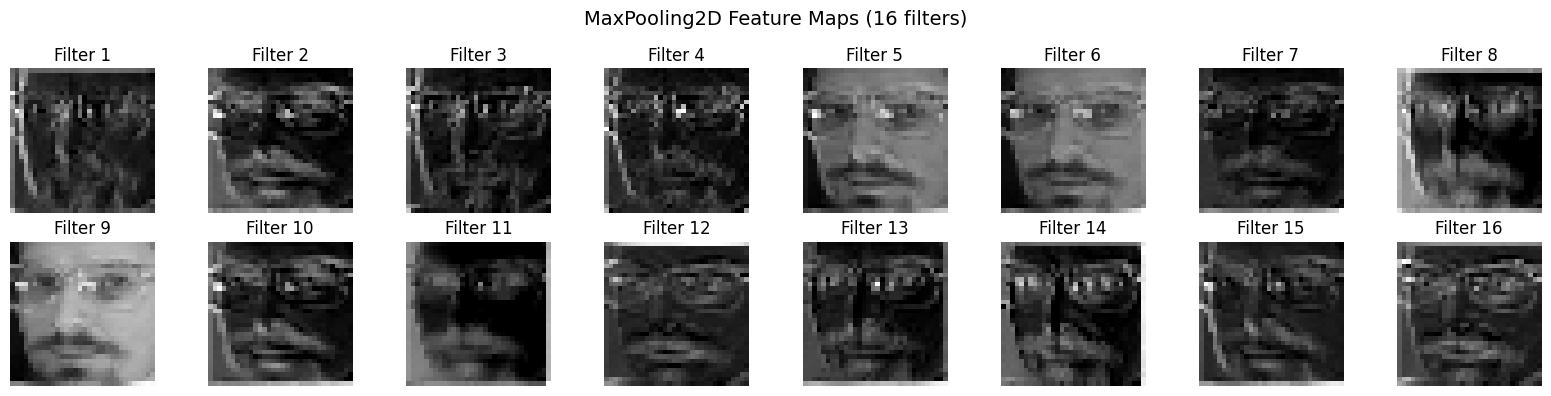

In [28]:
# Call the model first to build the graph
_ = model_1.predict(X_train[:1])

# Now extract feature maps
feature_map_model_1 = Model(inputs=model_1.input,
                          outputs=[model_1.layers[1].output, # Conv2D
                                   model_1.layers[2].output] # MaxPooling2D
                           )

sample_input = sample_image.reshape(1, 64, 64, 1)
conv_maps, pool_maps = feature_map_model_1.predict(sample_input)

# Plot conv layer feature maps
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
fig.suptitle('Conv2D Feature Maps (16 filters)', fontsize=14)
for i, ax in enumerate(axes.flat):
    ax.imshow(conv_maps[0, :, :, i], cmap='gray')
    ax.set_title(f'Filter {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Plot pooling layer feature maps
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
fig.suptitle('MaxPooling2D Feature Maps (16 filters)', fontsize=14)
for i, ax in enumerate(axes.flat):
    ax.imshow(pool_maps[0, :, :, i], cmap='gray')
    ax.set_title(f'Filter {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [29]:
print(conv_maps.shape)
print(pool_maps.shape)
for i, layer in enumerate(model_1.layers):
    print(i, layer.name, layer.output.shape)

(1, 64, 64, 16)
(1, 32, 32, 16)
0 input_layer_2 (None, 64, 64, 1)
1 conv2d_1 (None, 64, 64, 16)
2 max_pooling2d_1 (None, 32, 32, 16)
3 flatten_1 (None, 16384)
4 dense_1 (None, 40)


## Part 3: Model 2




### Step 11: Model 2's Architecture

Fit the model from (7) again, but this time use a window size of 9 for the convolution layer.

In [30]:
# Change model1 so that it has a window size of 9.

# Convolution Neural Network Model
input_tensor = Input(shape=(64, 64, 1))
x = Conv2D(16, kernel_size=9, strides=1, activation='relu', padding='same')(input_tensor)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Flatten()(x)
output_tensor = Dense(40, activation='softmax')(x)

model_2 = Model(inputs=input_tensor, outputs=output_tensor)

In [31]:
# Compiling model2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train_ohe, epochs=20, batch_size=10, validation_data=(X_test, y_test_ohe))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.0250 - loss: 3.9036 - val_accuracy: 0.0750 - val_loss: 3.6881
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.0600 - loss: 3.6841 - val_accuracy: 0.0700 - val_loss: 3.6748
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1150 - loss: 3.6565 - val_accuracy: 0.1350 - val_loss: 3.6234
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1500 - loss: 3.5498 - val_accuracy: 0.2100 - val_loss: 3.4500
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4000 - loss: 3.2013 - val_accuracy: 0.5400 - val_loss: 2.9984
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6600 - loss: 2.5028 - val_accuracy: 0.6850 - val_loss: 2.2545
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8150 - loss: 1.5914 - val_accuracy: 0.7700 - val_loss: 1.5904
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8950 - loss: 0.8890 - val_accuracy: 0.7050 - v

In [32]:
model_2.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 16)     │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │       655,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,970,138 (7.52 MB)

 Trainable params: 656,712 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,313,426 (5.01 MB)

### Step 12: Model 2's loss and accuracy

Print the loss accuracy on the test set.

In [36]:
# Loss and Accuracy
loss2, accuracy2 = model_2.evaluate(X_test, y_test_ohe)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9300 - loss: 0.3467
Test loss: 0.3467
Test accuracy: 0.9300


### Step 13: Feature Maps

Print the feature maps for the model in for the same image you used in (9) and (10).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


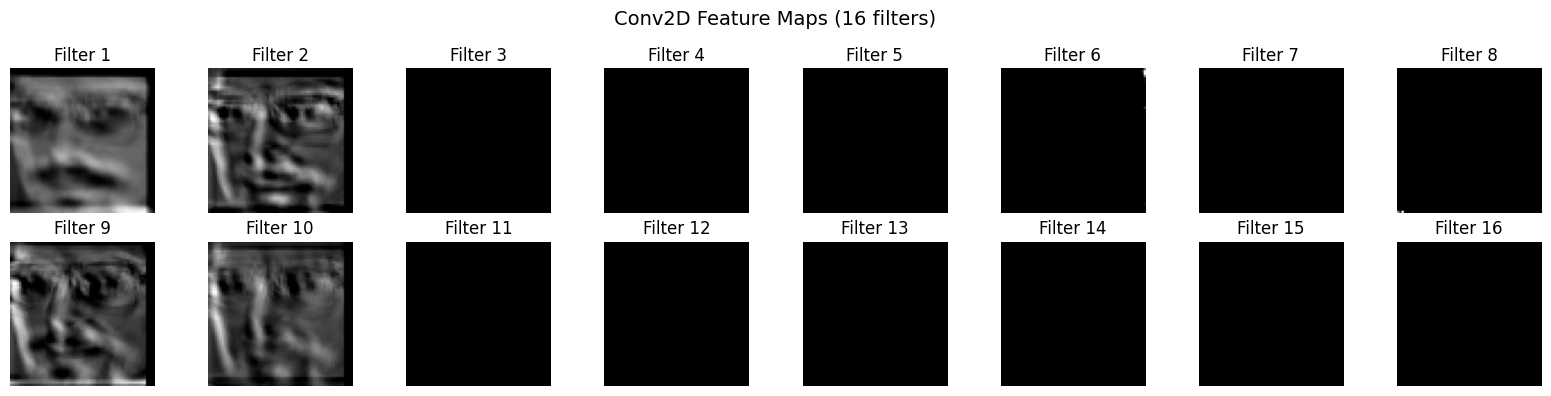

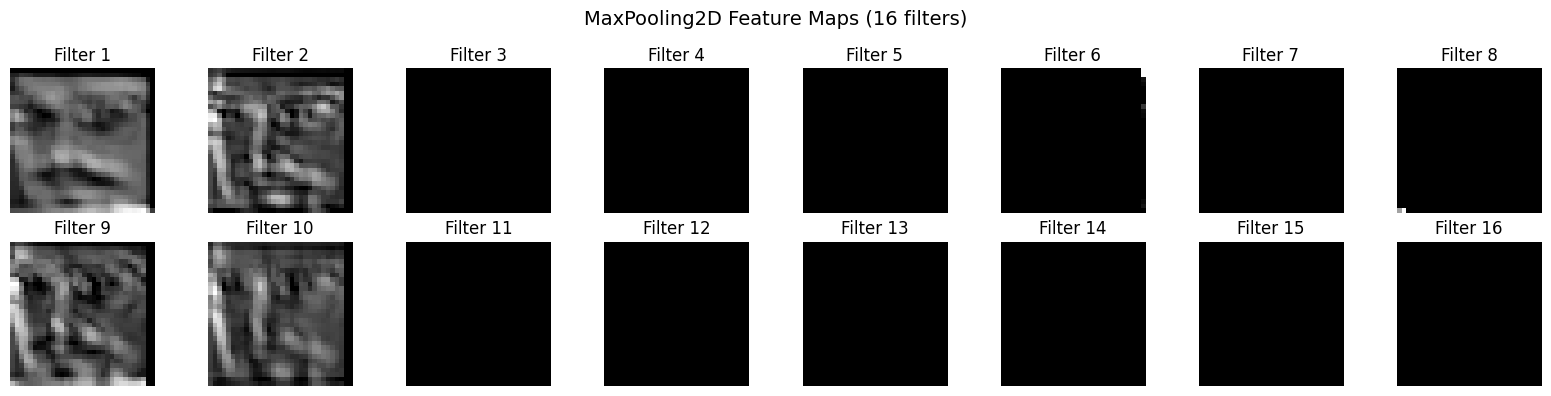

In [34]:
# Call the model first to build the graph
_ = model_2.predict(X_train[:1])

# Now extract feature maps
feature_map_model_2 = Model(inputs=model_2.input,
                          outputs=[model_2.layers[1].output, # Conv2D
                                   model_2.layers[2].output] # MaxPooling2D
                           )

sample_input = sample_image.reshape(1, 64, 64, 1)
conv_maps, pool_maps = feature_map_model_2.predict(sample_input)

# Plot conv layer feature maps
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
fig.suptitle('Conv2D Feature Maps (16 filters)', fontsize=14)
for i, ax in enumerate(axes.flat):
    ax.imshow(conv_maps[0, :, :, i], cmap='gray')
    ax.set_title(f'Filter {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Plot pooling layer feature maps
fig, axes = plt.subplots(2, 8, figsize=(16, 4))
fig.suptitle('MaxPooling2D Feature Maps (16 filters)', fontsize=14)
for i, ax in enumerate(axes.flat):
    ax.imshow(pool_maps[0, :, :, i], cmap='gray')
    ax.set_title(f'Filter {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Part IV: Model comparison & model optimization


### Step 14: Model comparison

Comment on the differences in the features maps between this model and the previous one. Which network gave better predictions on the test set?

The kernel size 3 model produced active feature maps across all 16 filters, with each filter detecting distinct local features — edges, contrast boundaries, facial structures like the glasses and mustache. The kernel size 9 model had only 4 active filters, with the remaining 12 completely dead. The larger window was too coarse to find diverse local patterns, leading most filters to converge to unhelpful weights that ReLU zeroed out entirely.

In [37]:
print(f"Model 1 (kernel=3) - Test loss: {loss1:.4f}, Test accuracy: {accuracy1:.4f}")
print(f"Model 2 (kernel=9) - Test loss: {loss2:.4f}, Test accuracy: {accuracy2:.4f}")


Model 1 (kernel=3) - Test loss: 0.2759, Test accuracy: 0.9350
Model 2 (kernel=9) - Test loss: 0.3467, Test accuracy: 0.9300


The kernel size 3 model outperformed kernel size 9 on both metrics — higher accuracy and lower loss. This aligns with what the feature maps showed: all 16 filters were active and learning diverse features in model 1, while model 2 had 12 dead filters limiting its representational capacity. The 3×3 window is better suited for this task because facial recognition relies on fine local features like edges and textures, which small filters detect more effectively than large ones. The 9×9 window is simply too blunt an instrument — it averages over too large a region to pick up the subtle local patterns that distinguish one face from another.


### Step 15: Model 3- Optimized neural network

Optimize the neural network to improve the accuracy on the test set. You should try to get a better accuracy than both of the previous models.  Consider changing the following, then print the accuracy on the test set:
*   Number of convolutional and pooling layers
*   Number of filters in the convolutional layer
*   Window size
*   Number of fully connected layers and neurons
*   Regularization (L1/L2 penalty, dropout, early stopping)
*   Number of epochs and batch size

Call this model `model3`.

In [43]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

input_tensor = Input(shape=(64, 64, 1))

# Block 1
x = Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same')(input_tensor)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Dropout(0.1)(x)

# Block 2
x = Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Dropout(0.1)(x)

# Fully connected
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
output_tensor = Dense(40, activation='softmax')(x)

model_3 = Model(inputs=input_tensor, outputs=output_tensor)

In [44]:
# Compiling model3
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

histor_y3 = model_3.fit(
    X_train, y_train_ohe,
    epochs=100,
    batch_size=10,
    validation_data=(X_test, y_test_ohe),
    callbacks=[early_stop]
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.0050 - loss: 3.7655 - val_accuracy: 0.0350 - val_loss: 3.6884
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.0550 - loss: 3.6874 - val_accuracy: 0.1150 - val_loss: 3.6807
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.0750 - loss: 3.6742 - val_accuracy: 0.2250 - val_loss: 3.6548
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.1200 - loss: 3.6206 - val_accuracy: 0.3500 - val_loss: 3.5583
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.2500 - loss: 3.3587 - val_accuracy: 0.3950 - val_loss: 3.0114
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.4350 - loss: 2.5274 - val_accuracy: 0.5200 - val_loss: 2.0410
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.6000 - loss: 1.6054 - val_accuracy: 0.7400 - val_loss: 1.3404
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8050 - loss: 0.8214 - val_accuracy: 0.

In [45]:
loss3, accuracy3 = model_3.evaluate(X_test, y_test_ohe)
print(f"Model 3 (optimized) - Test loss: {loss3:.4f}, Test accuracy: {accuracy3:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9550 - loss: 0.2154
Model 3 (optimized) - Test loss: 0.2154, Test accuracy: 0.9550


### Step 16: Reflection on Model 3

Write a few sentences describing how you optimized the model in this part. What worked well?

To optimize the model, I added a second convolutional block with 64 filters following the initial 32-filter block, allowing the network to learn a hierarchy of features — simple edges and textures in the first layer, and more complex combinations in the second. I also added a fully connected hidden layer with 256 neurons before the output layer to give the network more capacity to combine learned features for classification. Dropout was used for regularization but kept deliberately light (0.1 after each pooling layer, 0.2 before the output) — aggressive dropout like 0.5 actually hurt performance on this dataset, likely because with only 200 training images the network needs to retain as much signal as possible. Early stopping with restore_best_weights=True and a patience of 15 allowed the model to train for up to 100 epochs while automatically selecting the best checkpoint. Together these changes improved test accuracy from 93.5% to 95.5%.